In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
data=pd.read_csv("compresive_strength_concrete.csv")

In [58]:
data.shape

(1030, 9)

In [59]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [60]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [61]:
np.where(data.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [62]:
X_train = data.sample(frac = 0.7, random_state = 123)
X_test = data.drop(X_train.index)

In [63]:
X_train.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
134,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30
13,190.0,190.0,0.0,228.0,0.0,932.0,670.0,90,42.33
996,152.6,238.7,0.0,200.0,6.3,1001.8,683.9,28,26.86
770,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,3,14.99
937,313.3,0.0,113.0,178.5,8.0,1001.9,688.7,28,36.80


#Assigning features and target variable

In [64]:
Y_train = X_train.iloc[:,-1]
X_train = X_train.iloc[:,0:-1]
Y_test = X_test.iloc[:,-1]
X_test = X_test.iloc[:,0:-1]

In [65]:
X_mean = X_train.mean()
X_train -= X_mean
X_std = X_train.std()
X_train /= X_std
X_test -= X_mean
X_test /= X_std

In [66]:
Y_mean = Y_train.mean()
Y_train -= Y_mean
Y_std = Y_train.std()
Y_train /= Y_std
Y_test -= Y_mean
Y_test /= Y_std

In [67]:
X_train.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                float64
dtype: object

In [68]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()


#Training and testing data splittion

#Model selection

In [69]:
from tensorflow.keras import layers as L
from tensorflow.keras import models as M

In [70]:
network = M.Sequential()

In [71]:
network.add(L.Dense(128,activation="relu",input_shape=(X_train.shape[1],)))

In [72]:
network.add(L.Dense(64,activation="relu"))

In [73]:
network.add(L.Dense(32,activation="relu"))

In [74]:
network.add(L.Dense(1))

In [75]:
network.compile(optimizer="rmsprop",loss=["mse"],metrics=["mae"])

In [76]:
history = network.fit(X_train,Y_train,epochs=200,validation_split=0.3)

Epoch 1/200
16/16 [==============================] - 0s 14ms/step - loss: 0.5560 - mae: 0.5881 - val_loss: 0.3889 - val_mae: 0.5001
Epoch 2/200
16/16 [==============================] - 0s 3ms/step - loss: 0.3260 - mae: 0.4483 - val_loss: 0.3172 - val_mae: 0.4449
Epoch 3/200
16/16 [==============================] - 0s 4ms/step - loss: 0.2436 - mae: 0.3873 - val_loss: 0.2973 - val_mae: 0.4111
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 0.2017 - mae: 0.3461 - val_loss: 0.2525 - val_mae: 0.3756
Epoch 5/200
16/16 [==============================] - 0s 4ms/step - loss: 0.1847 - mae: 0.3368 - val_loss: 0.2265 - val_mae: 0.3595
Epoch 6/200
16/16 [==============================] - 0s 3ms/step - loss: 0.1675 - mae: 0.3230 - val_loss: 0.2576 - val_mae: 0.3904
Epoch 7/200
16/16 [==============================] - 0s 3ms/step - loss: 0.1523 - mae: 0.3018 - val_loss: 0.2086 - val_mae: 0.3501
Epoch 8/200
16/16 [==============================] - 0s 4ms/step - loss: 0.1448 - 

16/16 [==============================] - 0s 4ms/step - loss: 0.0453 - mae: 0.1577 - val_loss: 0.1557 - val_mae: 0.3038
Epoch 64/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0398 - mae: 0.1472 - val_loss: 0.1600 - val_mae: 0.2969
Epoch 65/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0328 - mae: 0.1332 - val_loss: 0.1428 - val_mae: 0.2811
Epoch 66/200
16/16 [==============================] - 0s 3ms/step - loss: 0.0476 - mae: 0.1619 - val_loss: 0.1356 - val_mae: 0.2717
Epoch 67/200
16/16 [==============================] - 0s 3ms/step - loss: 0.0395 - mae: 0.1474 - val_loss: 0.1419 - val_mae: 0.2890
Epoch 68/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0373 - mae: 0.1480 - val_loss: 0.1480 - val_mae: 0.2964
Epoch 69/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0369 - mae: 0.1453 - val_loss: 0.1366 - val_mae: 0.2724
Epoch 70/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0425 - mae: 0

Epoch 125/200
16/16 [==============================] - 0s 3ms/step - loss: 0.0305 - mae: 0.1194 - val_loss: 0.1364 - val_mae: 0.2695
Epoch 126/200
16/16 [==============================] - 0s 3ms/step - loss: 0.0278 - mae: 0.1188 - val_loss: 0.1388 - val_mae: 0.2750
Epoch 127/200
16/16 [==============================] - 0s 3ms/step - loss: 0.0261 - mae: 0.1142 - val_loss: 0.1346 - val_mae: 0.2728
Epoch 128/200
16/16 [==============================] - 0s 3ms/step - loss: 0.0269 - mae: 0.1176 - val_loss: 0.1331 - val_mae: 0.2703
Epoch 129/200
16/16 [==============================] - 0s 2ms/step - loss: 0.0305 - mae: 0.1232 - val_loss: 0.1306 - val_mae: 0.2657
Epoch 130/200
16/16 [==============================] - 0s 3ms/step - loss: 0.0245 - mae: 0.1098 - val_loss: 0.1375 - val_mae: 0.2717
Epoch 131/200
16/16 [==============================] - 0s 3ms/step - loss: 0.0313 - mae: 0.1213 - val_loss: 0.1440 - val_mae: 0.2693
Epoch 132/200
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0240 - mae: 0.1070 - val_loss: 0.1323 - val_mae: 0.2640
Epoch 187/200
16/16 [==============================] - 0s 3ms/step - loss: 0.0236 - mae: 0.1033 - val_loss: 0.1354 - val_mae: 0.2635
Epoch 188/200
16/16 [==============================] - 0s 3ms/step - loss: 0.0235 - mae: 0.1098 - val_loss: 0.1365 - val_mae: 0.2681
Epoch 189/200
16/16 [==============================] - 0s 2ms/step - loss: 0.0213 - mae: 0.0988 - val_loss: 0.1403 - val_mae: 0.2689
Epoch 190/200
16/16 [==============================] - 0s 2ms/step - loss: 0.0227 - mae: 0.1007 - val_loss: 0.1423 - val_mae: 0.2704
Epoch 191/200
16/16 [==============================] - 0s 3ms/step - loss: 0.0219 - mae: 0.1047 - val_loss: 0.1497 - val_mae: 0.2784
Epoch 192/200
16/16 [==============================] - 0s 2ms/step - loss: 0.0200 - mae: 0.0984 - val_loss: 0.1378 - val_mae: 0.2637
Epoch 193/200
16/16 [==============================] - 0s 2ms/step - loss: 0.0208 -

In [77]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [78]:
loss,mae=network.evaluate(X_test,Y_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.1243 - mae: 0.2375


In [79]:
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']

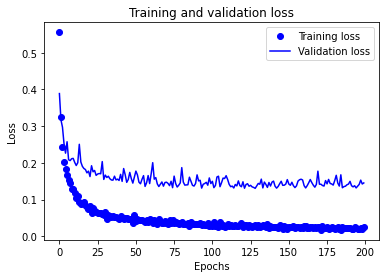

In [80]:
import matplotlib.pyplot as plt 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(200)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

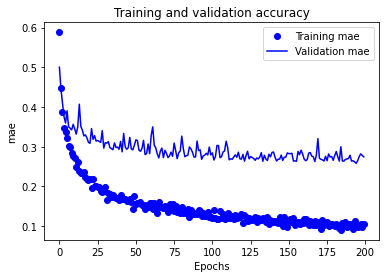

In [81]:
import matplotlib.pyplot as plt 
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
plt.plot(epochs, acc_values, 'bo', label='Training mae')
plt.plot(epochs, val_acc_values, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [82]:
y_pred = network.predict(X_test)

In [83]:
def denorm(x):
    return (x * Y_std) + Y_mean
    

In [84]:
y_pred = denorm(y_pred)

In [85]:
y_true = denorm(Y_test)

In [86]:
y_pred = y_pred.flatten()

In [87]:
y_pred.shape

(309,)

In [88]:
y_true.shape

(309,)

(0.0, 100.0)

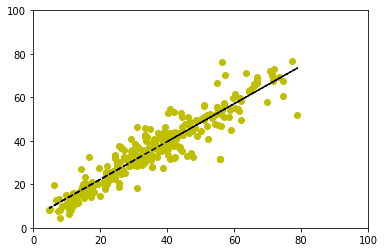

In [89]:
import numpy as np
import matplotlib.pyplot as plt
coef = np.polyfit(y_true,y_pred,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(y_true,y_pred, 'yo', y_true, poly1d_fn(y_true), '--k')
plt.xlim(0, 100)
plt.ylim(0, 100)